### Tuebingen 2019

The data was collected for a Bachelor Thesis.

In [1]:
import sys
sys.path.append("../..")
import pandas as pd
import numpy as np
import pyadlml

In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [3]:
from pyadlml.datasets import set_data_home, set_parallel, fetch_tuebingen_2019
set_data_home('/home/chris/code/adlml/data_home')
set_parallel(True)
data = fetch_tuebingen_2019(keep_original=True, cache=True)

In [4]:
data.df_activities.head()

,start_time,end_time,activity
0,2019-06-25 10:19:03.369760,2019-06-25 10:21:30.557350,learning
1,2019-06-25 10:21:30.558833,2019-06-25 10:25:39.651115,leave_home
2,2019-06-25 10:25:39.652609,2019-06-25 10:29:45.689900,outside_activity
3,2019-06-25 10:29:45.691387,2019-06-25 10:29:59.518672,enter_home
4,2019-06-25 10:29:59.520149,2019-06-25 10:30:23.516754,leave_home


In [5]:
data.df_devices.head()

,time,device,val
0,2019-05-05 10:35:42.362319,switch.chris_computer,True
1,2019-05-05 10:35:42.380761,binary_sensor.us_distance_monitor_left,False
2,2019-05-05 10:35:42.390893,binary_sensor.us_distance_mirror,False
3,2019-05-05 10:35:42.394492,binary_sensor.pir_motion_floor,False
4,2019-05-05 10:35:42.396775,binary_sensor.us_distance_floor,False


# Activities

There are 7 activities present in the dataset. The following plot shows the data recorded over one month. 

To note is that *go to bed* and *leave house* are the dominant activities. A lot of gaps seem to between the activities. 

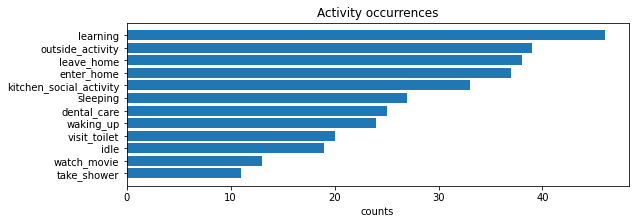

In [6]:
from pyadlml.dataset.plot.activities import hist_counts

idle = True

hist_counts(data.df_activities, idle=idle);

The most performed activity is *use toilet* and *go to bed*. There is an exponential decay between the amount of the most and least performed activity.

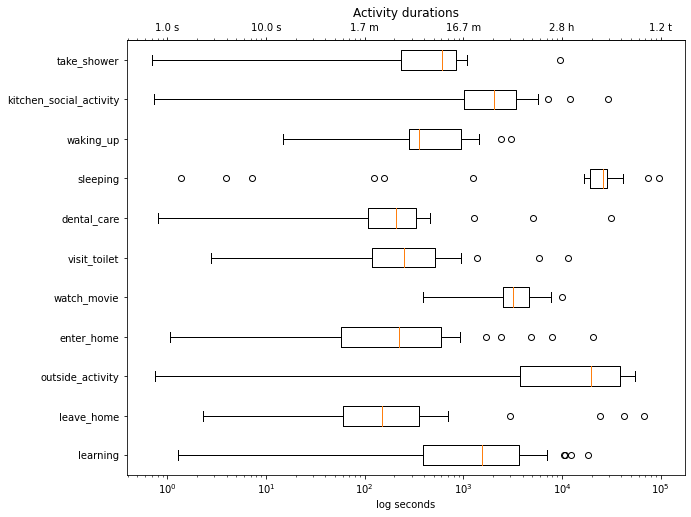

In [7]:
from pyadlml.dataset.plot.activities import boxplot_duration

idle = False

boxplot_duration(data.df_activities, idle=idle);

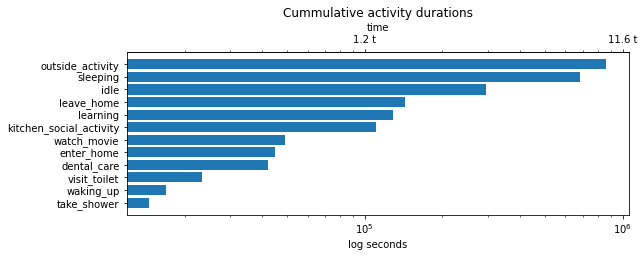

In [8]:
from pyadlml.dataset.plot.activities import hist_cum_duration

idle = True
y_scale = 'log'

hist_cum_duration(data.df_activities, y_scale=y_scale, idle=idle);

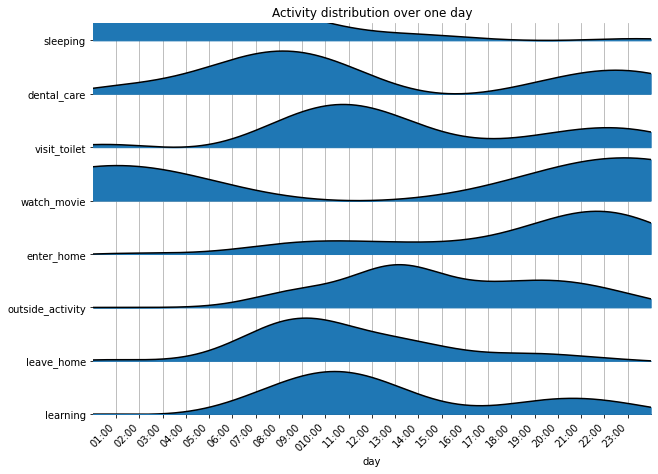

In [9]:
from pyadlml.dataset.plot.activities import ridge_line
#Parameters
n = 100 # number of samples to draw to approximate distribution
# TODO change the calculation by mapping each interval onto a second grid with 1's for stuff
# in the interval and 0's outside. Add all intervals on each other to get the histogram
idle = False
dist_scale = 0.12 
ylim_upper = 0.03

ridge_line(data.df_activities, n=n, dist_scale=dist_scale,
           ylim_upper=ylim_upper, idle=idle)

#### Transition Heatmap
$x_{72}$ should be read as first used the toilet and after that went to bed for a total of 46 times

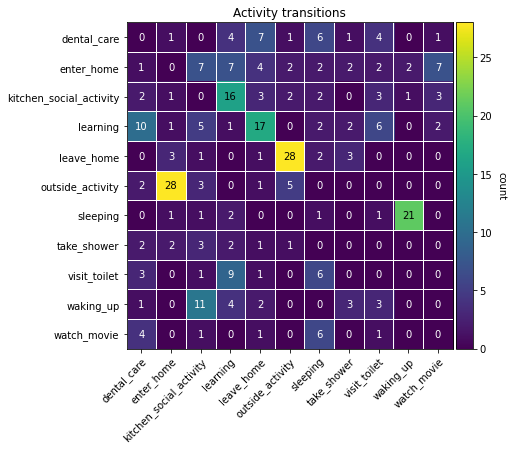

In [10]:
from pyadlml.dataset.plot.activities import heatmap_transitions

idle = False
z_scale = None #'log'

heatmap_transitions(data.df_activities, z_scale=z_scale, idle=idle);

# Devices

Feature engineering includes:

In [4]:
from pyadlml.dataset.devices import device_rep1_2_rep2
rep2_nodrop, syn_acts = device_rep1_2_rep2(data.df_devices, drop=False)
rep2_drop = device_rep1_2_rep2(data.df_devices, drop=True)

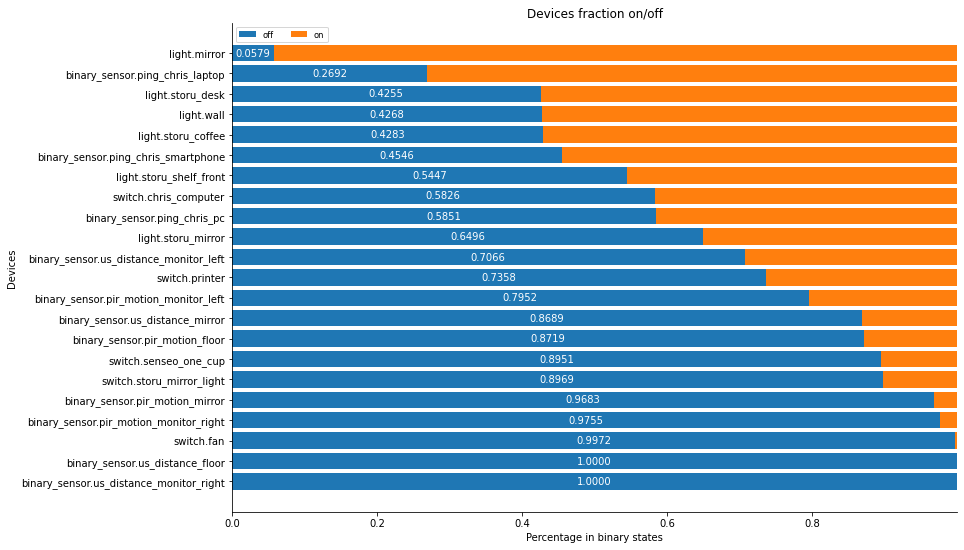

In [5]:
from pyadlml.dataset.plot.devices import hist_on_off
hist_on_off(rep2_nodrop)

As we can see a lot of devices are off the whole time.

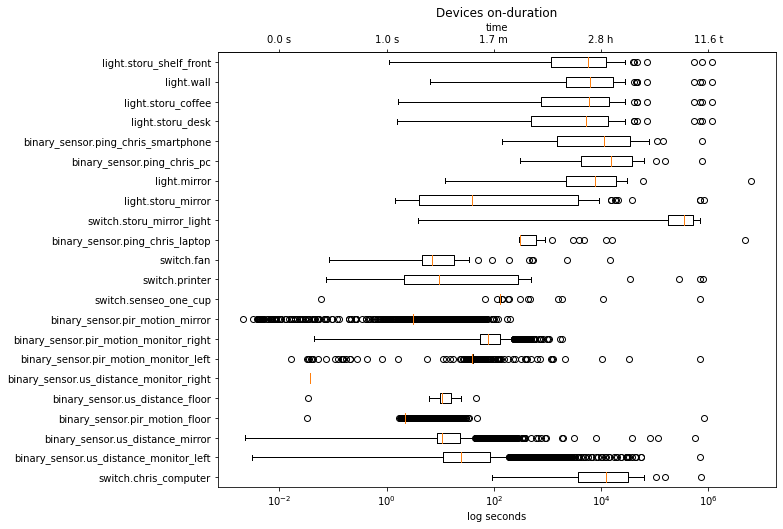

In [13]:
from pyadlml.dataset.plot.devices import boxsplot_on_duration
boxsplot_on_duration(rep2_nodrop);

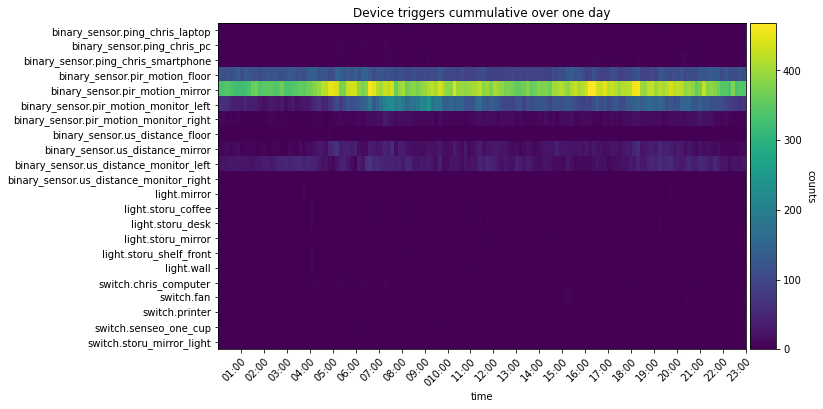

In [14]:
from pyadlml.dataset.plot.devices import heatmap_trigger_one_day
heatmap_trigger_one_day(data.df_devices, t_res='10m');

In [15]:
from pyadlml.dataset.plot.devices import heatmap_trigger_time

t_window = '20s'
z_scale = 'log'

heatmap_trigger_time(data.df_devices, t_window=t_window, z_scale=z_scale, figsize=(8,8))

KeyboardInterrupt: 

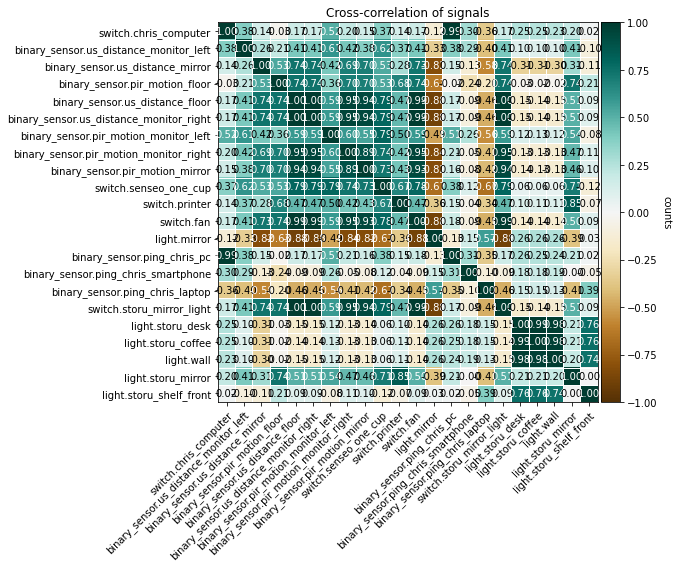

In [17]:
from pyadlml.dataset.plot.devices import heatmap_cross_correlation
heatmap_cross_correlation(data.df_devices)

../../pyadlml/dataset/plot/devices.py:34: RuntimeWarning:

divide by zero encountered in log10

/home/chris/Desktop/code/adlml/pyadlml/venv_pyadml/lib/python3.8/site-packages/numpy/core/function_base.py:153: RuntimeWarning:

invalid value encountered in multiply

/home/chris/Desktop/code/adlml/pyadlml/venv_pyadml/lib/python3.8/site-packages/numpy/core/function_base.py:163: RuntimeWarning:

invalid value encountered in add

/home/chris/Desktop/code/adlml/pyadlml/venv_pyadml/lib/python3.8/site-packages/numpy/lib/histograms.py:433: RuntimeWarning:

invalid value encountered in greater

../../pyadlml/dataset/plot/devices.py:38: RuntimeWarning:

invalid value encountered in true_divide



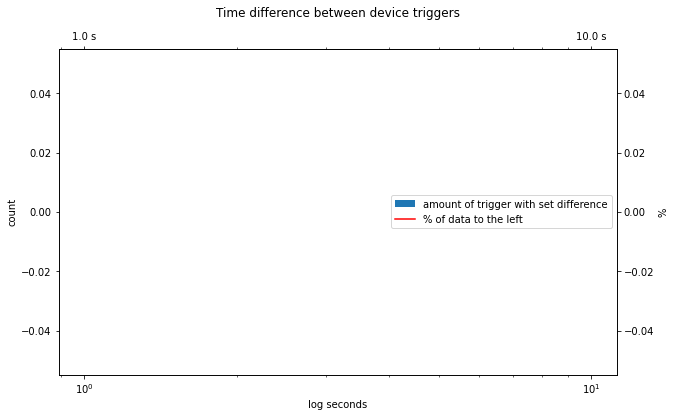

In [7]:
from pyadlml.dataset.plot.devices import hist_trigger_time_diff
hist_trigger_time_diff(data.df_devices);

We can see that about $33\%$ of the triggers preceed each other in a timeslice lower than $1$ second and about $80\%$ of the triggers in a timeslice lower than $1$ minute. In the paper (cite kasteren) a timeslice of $60$ seconds was used.

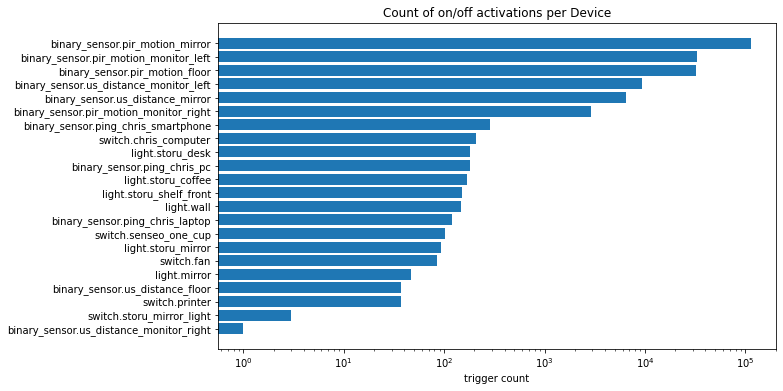

In [9]:
from pyadlml.dataset.plot.devices import hist_counts
hist_counts(data.df_devices, y_scale='log');

The distribution of triggers is also exponentially decaying for some devices e.g the Washingmaschine is used a lot less than the Hall-Bathroom door.

# Activites ~ Devices


### Triggers
Lets look at the connection between the activities and the device activations.

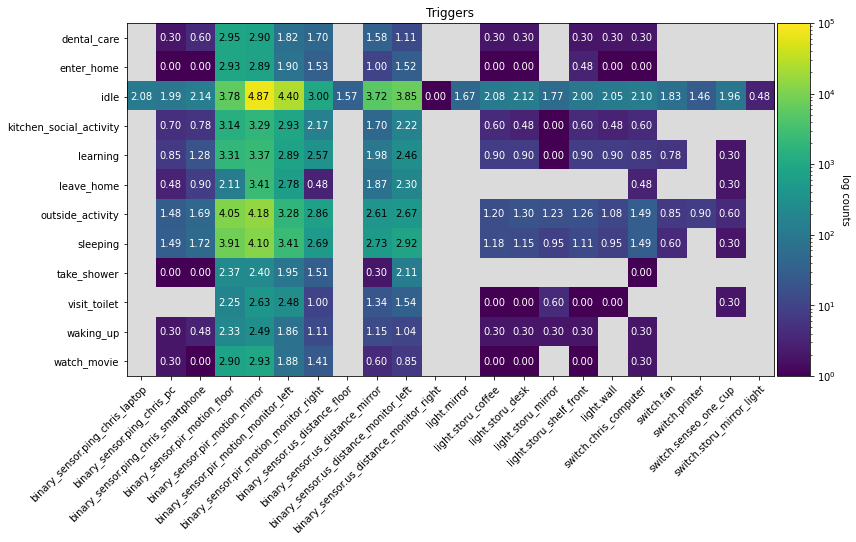

In [11]:
from pyadlml.dataset.plot import heatmap_contingency_triggers

idle = True
z_scale = 'log'

heatmap_contingency_triggers(data.df_devices, data.df_activities, idle=idle, z_scale=z_scale)

We can see that there are sensors that heavily trigger for certain activities e.g hall-bathroom door and use toilet

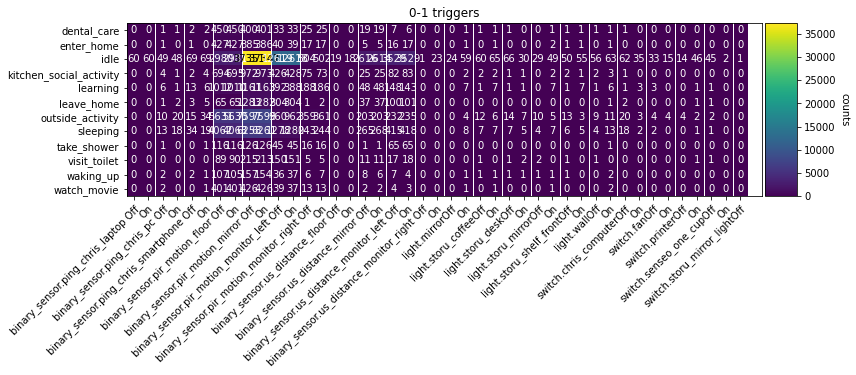

In [12]:
from pyadlml.dataset.plot import heatmap_contingency_triggers_01

idle = True
z_scale = None#'log'

heatmap_contingency_triggers_01(data.df_devices, data.df_activities, 
                                idle=idle, z_scale=z_scale);

Sadly the different states of a device don't convey much information. It would have been nice if an activity is only involved with a single device transition.

## Duration

the overlap of the intervals is also interesting.

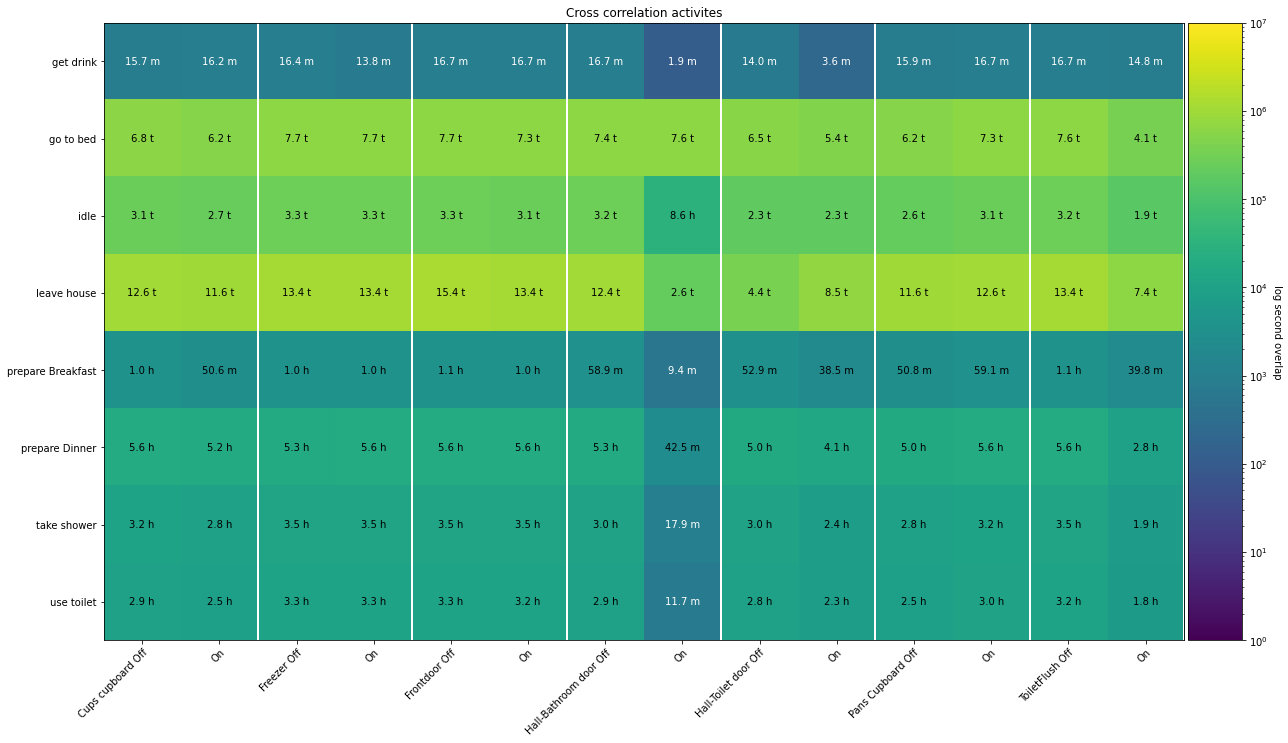

In [23]:
from pyadlml.dataset.plot import heatmap_contingency_overlaps

z_scale='log'
idle=True

heatmap_contingency_overlaps(data.df_devices, data.df_activities, z_scale=z_scale, idle=idle)

# Representations

There are different ways to represent our data. One way is to discretize the data into intervals.

- RAW representation _____|^^^^^^|______  
    is 1 whenever the sensor is 'on' and 0 otherwise 

- Changepoint representation ______|________|______  
    sensor gives a 1 to timeslices where the sensor reading changes

- LastFired representation ______|^^^^^^^^^  
    last sensor that changed state gives cont. 1

- Lagged representation
    the 

## RAW - representation

In [24]:
from pyadlml.preprocessing import RawEncoder

enc_raw = RawEncoder()
raw = enc_raw.fit_transform(data.df_devices)

In [25]:
raw

,Hall-Bedroom door,Hall-Toilet door,Hall-Bathroom door,ToiletFlush,Plates cupboard,Fridge,Microwave,Groceries Cupboard,Dishwasher,Pans Cupboard,Cups cupboard,Frontdoor,Freezer,Washingmachine
time,,,,,,,,,,,,,,
2008-02-25 00:20:14,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-02-25 00:22:57,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-02-25 09:33:41,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-02-25 09:33:42,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-02-25 09:33:47,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-03-21 18:28:20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-03-21 19:11:10,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2008-03-21 19:11:14,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(raw)
lbls = enc_lbl.fit_transform(data.df_activities)

In [27]:
import numpy as np

def check_raw_undiscretized(raw):
    # should not contain any  nan values
    assert not raw.isnull().values.any()
    
    # rows can only differ in one number
    for i in range(1, len(raw)):
        assert 1 == np.abs(np.sum(raw.iloc[i-1].values - raw.iloc[i].values))
    
check_raw_undiscretized(raw)

In [28]:
def check_raw(raw):
    # should not contain any  nan values
    assert not raw.isnull().values.any()
    
check_raw(raw)

/home/chris/Desktop/code/adlml/pyadlml/venv_pyadml/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



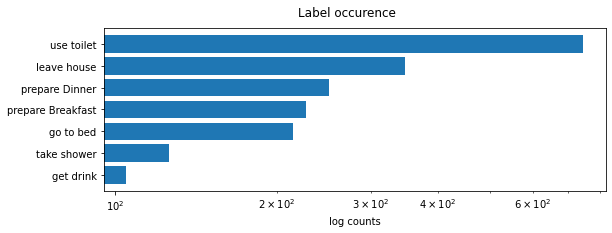

In [29]:
from pyadlml.dataset.plot.raw import hist_activities

hist_activities(enc_lbl.inverse_transform(lbls), scale='log')

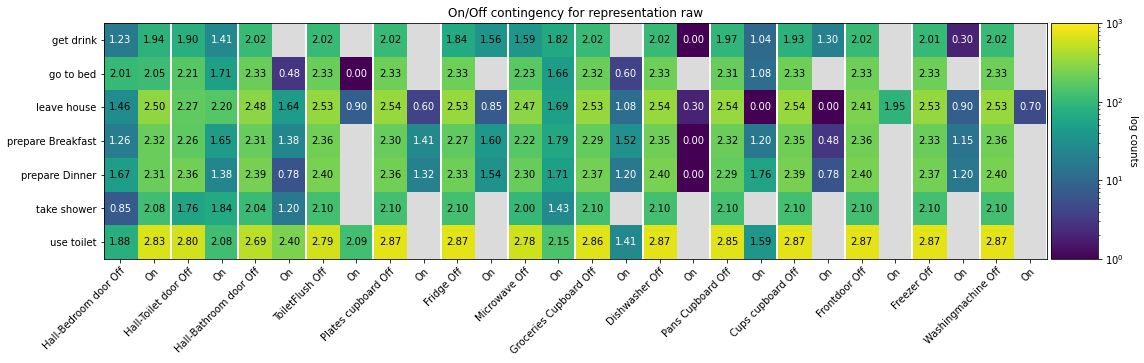

In [30]:
from pyadlml.dataset.plot.raw import heatmap_contingency_01

z_scale = 'log'
rep = 'raw'

heatmap_contingency_01(raw, enc_lbl.inverse_transform(lbls), rep=rep, z_scale=z_scale);

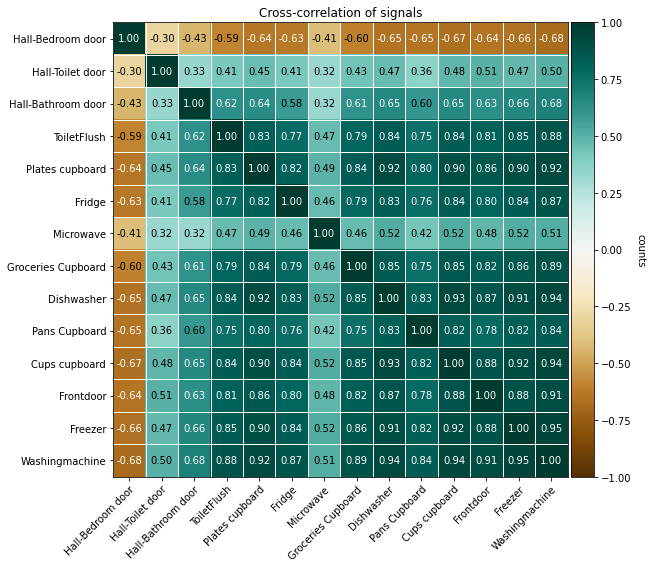

In [31]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(raw);

In [32]:
# TODO sth. is wrong here
#from pyadlml.dataset.plot.raw import corr_devices_01
#corr_devices_01(raw)

## Changepoint - representation
Raw: _____|^^^^^^|______  

CP :  ______|________|______  

sensor gives a 1 to timeslices where the sensor reading changes

In [33]:
from pyadlml.preprocessing import ChangepointEncoder

idle = True
t_res = '60s'

cp_enc = ChangepointEncoder(t_res=t_res)
cp = cp_enc.fit_transform(data.df_devices)

In [34]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(cp, idle=idle)
lbls = enc_lbl.fit_transform(data.df_activities)

In [35]:
def check_changepoint(cp):
    # should not contain any  nan values
    assert not cp.isnull().values.any()

check_changepoint(cp)

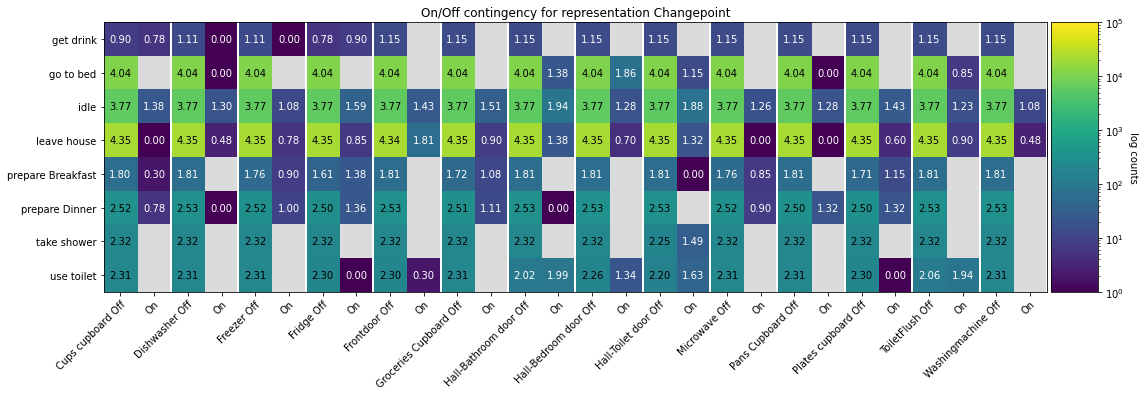

In [36]:
from pyadlml.dataset.plot.raw import heatmap_contingency_01

z_scale = 'log'
rep = 'Changepoint'

heatmap_contingency_01(cp, enc_lbl.inverse_transform(lbls), rep=rep, z_scale=z_scale);

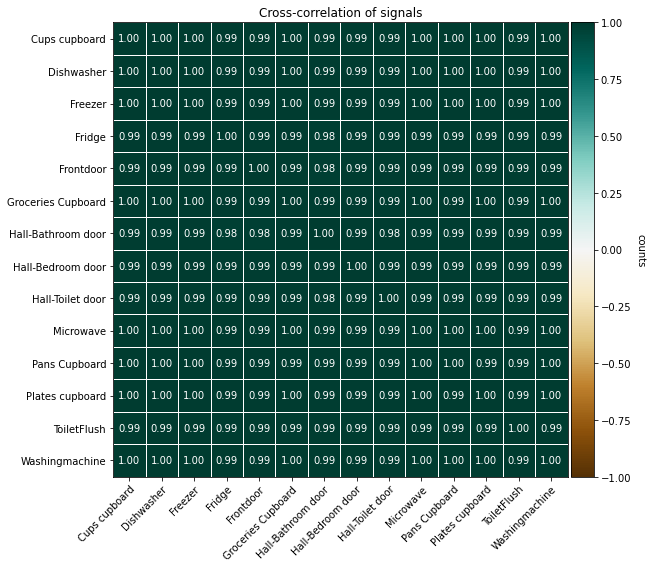

In [37]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(cp);

## LastFired - representation
______|^^^^^^^^^  

last sensor that changed state gives cont. 1

In [38]:
from pyadlml.preprocessing import LastFiredEncoder

t_res = '60s'
idle=True

lf_enc = LastFiredEncoder(t_res=t_res)
lf = lf_enc.fit_transform(data.df_devices)

In [39]:
from pyadlml.preprocessing import LabelEncoder

enc_lbl = LabelEncoder(lf, idle=idle)
lbls = enc_lbl.fit_transform(data.df_activities)

In [40]:
def check_lastfired(lf):
    # should not contain any  nan values
    assert not lf.isnull().values.any()
    
    # each row has to have exactly one device being on
    for row in lf.iterrows():
        assert 1 == row[1].values.sum()

check_lastfired(lf)

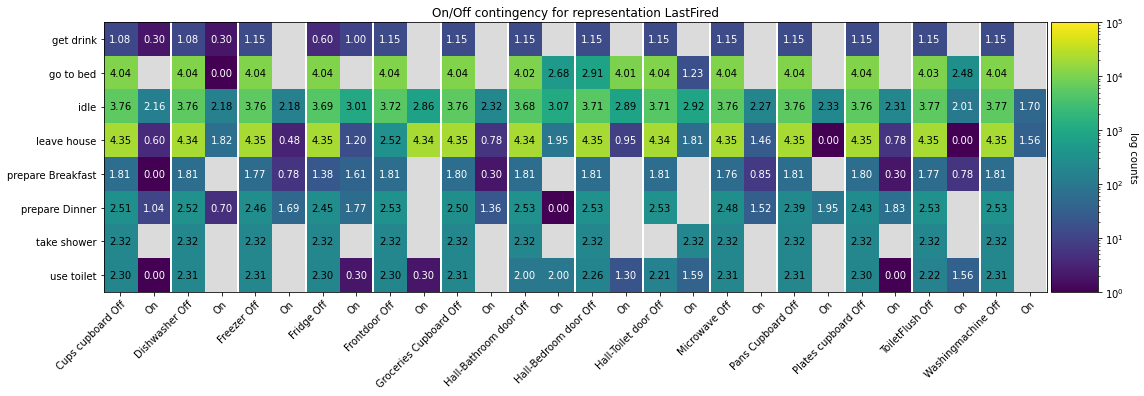

In [41]:
from pyadlml.dataset.plot.raw import heatmap_contingency_01

z_scale = 'log'
rep = 'LastFired'

heatmap_contingency_01(lf, enc_lbl.inverse_transform(lbls), rep=rep, z_scale=z_scale);

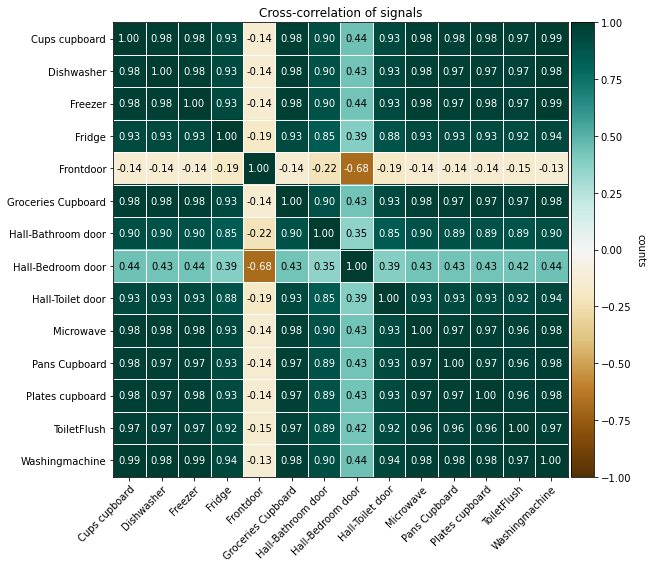

In [42]:
from pyadlml.dataset.plot.raw import heatmap_cross_correlation

heatmap_cross_correlation(lf);

## Image - representation

a lot of timeseries can be represented as images. There are good algorithms for images available. There are Recurrence Plots (RP), Gramian Angular Field (GAF) (bad for binary data), Markov Transition Field (MTF): https://doi.org/10.3390/electronics9010068.


Gramian Angular field: 
    https://medium.com/analytics-vidhya/encoding-time-series-as-images-b043becbdbf3
    
    https://pyts.readthedocs.io/en/stable/auto_examples/image/plot_mtf.html#sphx-glr-auto-examples-image-plot-mtf-py

### Lagged RAW

The lagged raw representation generates a 3D tensor from the raw input. A state at time $t$ is $1D$ vector. The window size determines how big the $2D$ picture is. Stack the windows in the third dimension.

Also see last part of
https://towardsdatascience.com/ml-approaches-for-time-series-4d44722e48fe

In [43]:
from pyadlml.preprocessing import LaggedRawEncoder, LaggedLabelEncoder

window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle = True

enc_lgd_raw = LaggedRawEncoder(window_size, 
                               t_res=t_res, 
                               sample_strat=sample_strat)

images = enc_lgd_raw.fit_transform(data.df_devices)

In [44]:
images.shape

(19983, 20, 14)

In [45]:
enc_lgd_lbl = LaggedLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

(19983, 1)

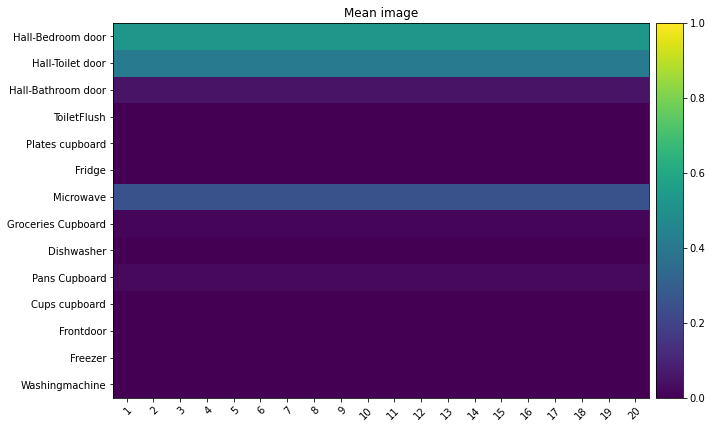

In [46]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, data.devices)

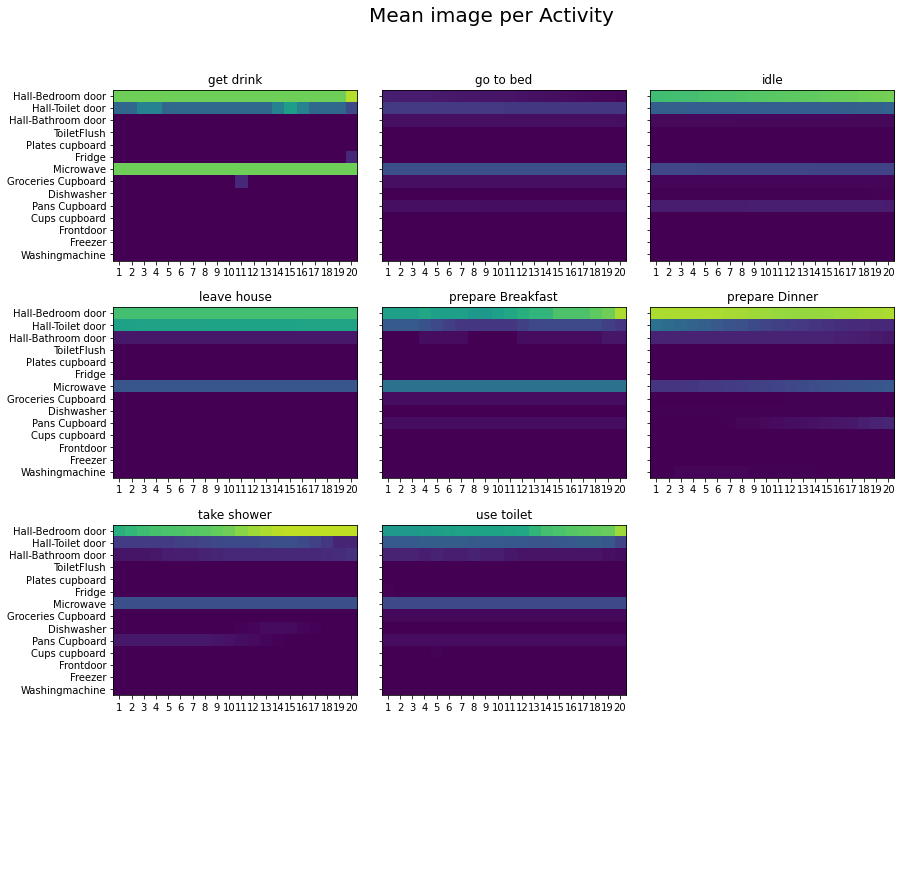

In [47]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, data.devices)

# Lagged Changepoint representation

In [48]:
from pyadlml.preprocessing import LaggedChangepointEncoder
window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle = True


enc_lgd_cp = LaggedChangepointEncoder(window_size, t_res=t_res)
images = enc_lgd_cp.fit_transform(data.df_devices)
images.shape

(19983, 20, 14)

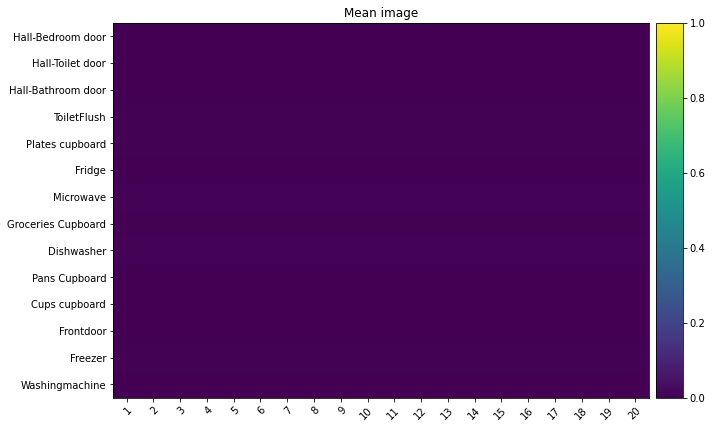

In [49]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, data.devices)

In [50]:
enc_lgd_lbl = LaggedLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

(19983, 1)

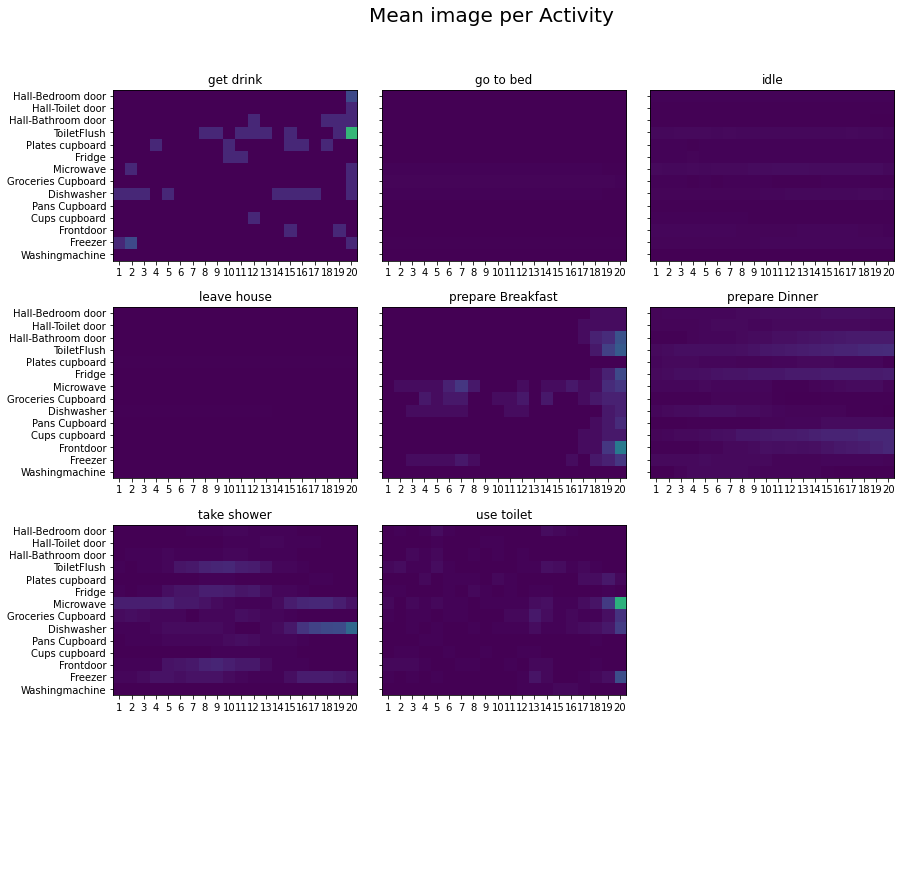

In [51]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, data.devices)

## Lagged Last Fired Encoder

In [52]:
from pyadlml.preprocessing import LaggedLastFiredEncoder
window_size = 20
t_res = '2min'
sample_strat = 'int_coverage'
idle=True


enc_lgd_lf = LaggedLastFiredEncoder(window_size, t_res=t_res)
images = enc_lgd_lf.fit_transform(data.df_devices)
images.shape

(19983, 20, 14)

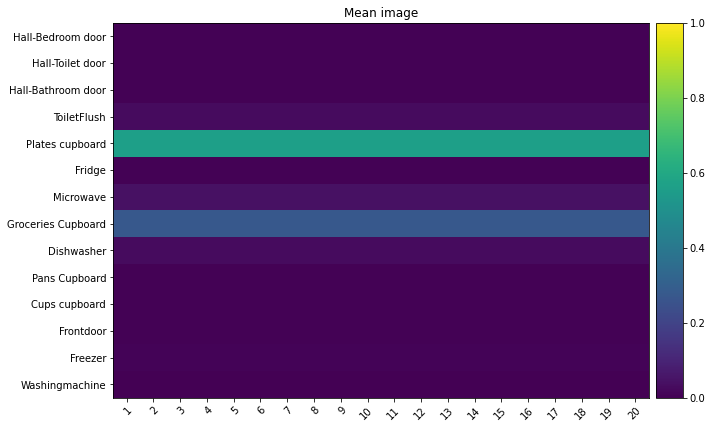

In [53]:
from pyadlml.dataset.plot.image import mean_image

mean_image(images, data.devices)

In [54]:
enc_lgd_lbl = LaggedLabelEncoder(data.df_devices,
                                        window_size, 
                                        t_res=t_res,
                                        idle=idle)

labels = enc_lgd_lbl.fit_transform(data.df_activities)
labels.shape

(19983, 1)

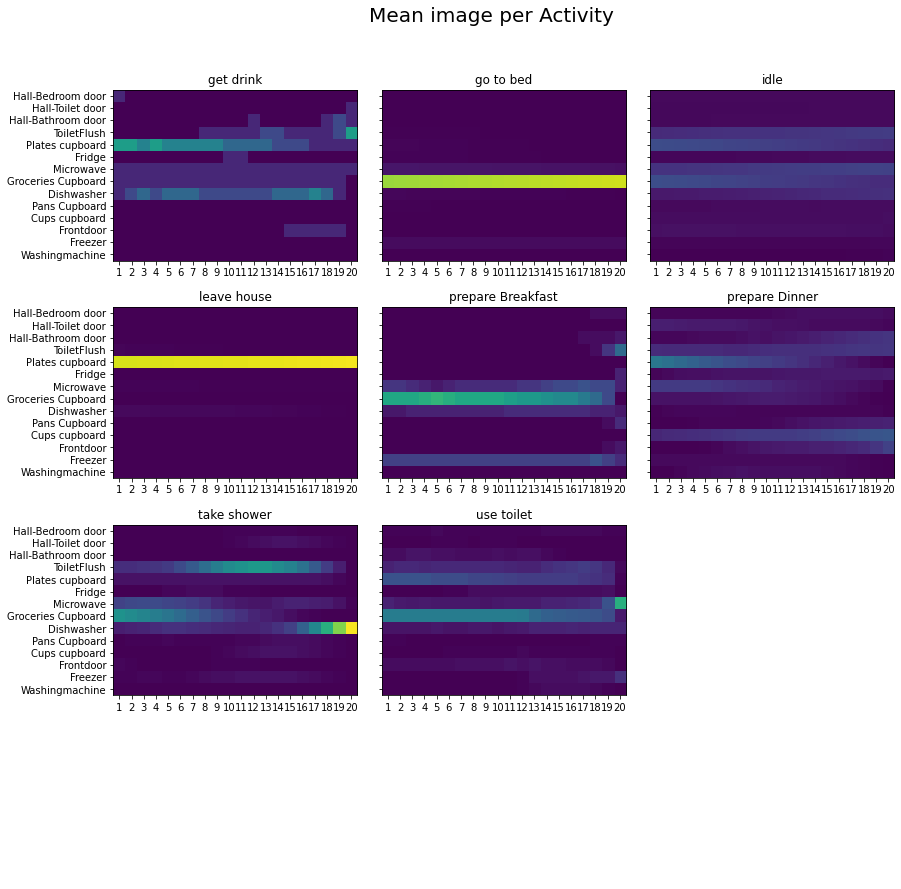

In [55]:
from pyadlml.dataset.plot.image import mean_image_per_activity

X = images
y = enc_lgd_lbl.inverse_transform(labels)

mean_image_per_activity(X, y, data.devices)